# Mini Project 3

_The code below provides a visual representation of how the Black-Scholes **call option** price changes with respect to time._

_**a)** Use the visualization to interpret how the **rate of change** of the Black-Scholes call option price behaves as time progresses._

_**b)** Create a separate graphic to visualize how the **rate of change** of the Black-Scholes call option price depends on the spot price $S_0$._

_**c)** Repeat parts **a** and **b** for **put option** prices._

_**d)** Record your observations and reflections based on the generated plots._

-------------------------

Throughout this notebook, we will assume that time is $t$, the time to expiration is $\tau$ and the expiration date is $T$. Thus, $\tau = T-t$.

We are to comment on the behaviour of $\Delta$ (spot price sensitivity) and $\Theta$ (time sensitivity) of call and put options for some sample code below, where 

$$\Delta_{C_0}:=\frac{\partial C_0}{\partial S_0}, \qquad \Delta_{P_0}:=\frac{\partial C_0}{\partial S_0}$$

is the **delta** of an option and

$$\Theta_{C_0} \coloneqq \frac{\partial C_0}{\partial t}\quad \mbox{and}\quad \Theta_{P_0} \coloneqq \frac{\partial P_0}{\partial t}$$

is the **theta** of an option.

### Summary:

- Call Option – Time Sensitivity $\left(\Theta_{C_0}\right)$: As time progresses (and the time to expiration $t$ decreases to 0), the B-S call option price $C_0$ decreases to 0 at an increasing rate. Thus $\Theta_{C_0}$ (the rate of change of $C_0$) is a decreasing function that takes negative values (becoming more negative / bigger in absolute value as time progresses), which approaches $-\infty$ as we approach the expiration date. Thus the call option loses value at an increasing rate. 
- Call Option – Spot Price Sensitivity $\left(\Delta_{C_0}\right)$: The rate of change of the call option with respect to spot price is an increasing function which takes values between 0 and 1. In particular, $\Delta_{C_0}$ approaches 0 (at a decreasing rate) as $S_0$ approaches 0, and $\Delta_{C_0}$ approaches 1 (at a decreasing rate) as $S_0$ approaches $+\infty$. Thus, as the spot price decreases more and more below the srike price, the call option loses value, approaching 0 at a decreasing rate. On the other hand, as the spot price increases well above the strike price, the call option gains in value, with the rate of change increasing but steadying to a constant value (1).
- Put Option – Time Sensitivity $\left(\Theta_{P_0}\right)$: Same behaviour as $\Theta_{C_0}$, i.e. a decreasing function of time taking negative values which approaches $-\infty$ as the time to expiration approaches zero.
- Put Option – Spot Price Sensitivity $\left(\Delta_{P_0}\right)$: The rate of change of the put option with respect to spot price is an increasing function which takes values between $-1$ and 0. In particular, $\Delta_{P_0}$ approaches 0 (at a decreasing rate) as $S_0$ approaches 0, and $\Delta_{P_0}$ approaches 1 (at a decreasing rate) as $S_0$ approaches $+\infty$. As the spot price decreases well below the strike price, the put gains in value, with the rate of change increasing but steadying to a constant value. As the spot price increases well above the strike price, the put value approaches 0. 

### Code:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm
import seaborn as sns
sns.set_style('darkgrid')

def bs_call(S0, K, sigma, tau=1, r=0):
    """
    Description:
    
    Computes the Black-Scholes value of a European call option.
    
    Parameters:
        S0: Current asset price
        K: Strike price
        sigma: Yearly standard deviation of log-returns (volatility)
        tau: Time to expiration (in years)
        r: Risk-free interest rate
    
    Returns:
        Call option price
    """
    
    d1 = (np.log(S0/K) + (r+.5*sigma**2)*tau)/(sigma*np.sqrt(tau))
    #d2 = (np.log(S0/K) + (r-.5*sigma**2)*t)/(sigma*np.sqrt(tau))
    d2 = d1 - sigma*np.sqrt(tau)
    return S0*norm.cdf(d1)-K*np.exp(-r*tau)*norm.cdf(d2)


def bs_put(S0, K, sigma, tau=1, r=0):
    """
    Description:
    
    Computes the Black-Scholes value of a European put option.
    
    Parameters:
        S0: Current asset price
        K: Strike price
        sigma: Yearly standard deviation of log-returns (volatility)
        tau: Time to expiration (in years)
        r: Risk-free interest rate
    
    Returns:
        Put option price
    """
    
    d1 = (np.log(S0/K) + (r+.5*sigma**2)*tau)/(sigma*np.sqrt(tau))
    d2 = d1 - sigma*np.sqrt(tau)
    return -S0*norm.cdf(-d1)+K*np.exp(-r*tau)*norm.cdf(-d2)

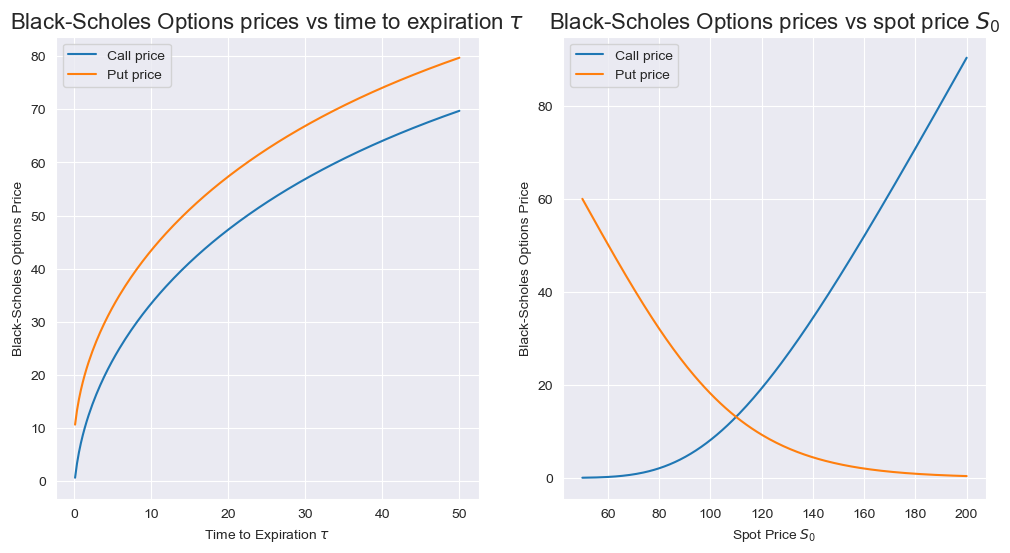

In [61]:
# Plot call price as a function of time to expiration tau (with underlying spot price fixed at S0=100) 
# and as a function of underlying spot price S0 (with underlying time to expiration fixed at tau=1)

# Define strike price and volatility

K = 110
sigma = .3

# As a function of time to expiration tau

S0 = 100
times = np.linspace(1/12, 50, 200)

call_prices = [bs_call(S0,K,sigma, tau = times[i]) for i in range(len(times))]
put_prices = [bs_put(S0,K,sigma, tau = times[i]) for i in range(len(times))]


fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].plot(times, call_prices, label="Call price")
axes[0].plot(times, put_prices, label="Put price")
axes[0].set_title(r'Black-Scholes Options prices vs time to expiration $\tau$', size = 16)
axes[0].set_xlabel(r'Time to Expiration $\tau$')
axes[0].set_ylabel('Black-Scholes Options Price')
axes[0].legend()

# As a function of S0

S0 = np.linspace(50, 200, 221)
time = 1

call_prices1 = [bs_call(S0[i],K,sigma, tau = time) for i in range(len(S0))]
put_prices1 = [bs_put(S0[i],K,sigma, tau = time) for i in range(len(S0))]


axes[1].plot(S0, call_prices1, label="Call price")
axes[1].plot(S0, put_prices1, label="Put price")
axes[1].set_title(r'Black-Scholes Options prices vs spot price $S_0$', size = 16)
axes[1].set_xlabel(r'Spot Price $S_0$')
axes[1].set_ylabel('Black-Scholes Options Price')
axes[1].legend()

plt.show()

### Observations:

On the left, we see that as time progresses (and thus the time to expiration $\tau$ _decreases_), the call and put prices lose value at an increasing rate. The call price approaches $(S_0 - K)^+$ (in the example above $S_0 = 100$ and $K=110$ so $(S_0 - K)^+=0$) while the put price approaches $(K-S_0)^+$ (above $(K-S_0)^+=10$) as the time to expiration $\tau$ approcahes zero. We conclude that the thetas (the rates of change of $C_0$ and $P_0$ with respect to time $t$) are decreasing functions taking negative values which become more negative as time progresses. Recalling that $T$ is the expiration time and $\tau=T-t$, in symbols we have

$$\Theta_{C_0}<0, \quad \Theta_{P_0}<0, \quad \lim_{\tau\to 0^+}\Theta_{C_0} =  \lim_{t\to T^-}\Theta_{C_0} = -\infty, \quad \lim_{\tau\to +\infty}\Theta_{C_0} =  \lim_{t\to -\infty}\Theta_{C_0} = 0,$$

with the same limiting behaviour for $\Theta_{P_0}$. (The limiting behaviour as $\tau\to+\infty$ will be confirmed in the plots given below).

On the other hand, on the right plot, we see that both the call and put deltas (the _slopes_ of the curves) are both monotone increasing functions of $S_0$, where the slope of the call option takes positive values in between $0$ and $1$ (approaching 0 when $S_0$ approaches 0 and approaching 1 when $S_0$ approaches $+\infty$), while the slope of the put option takes negative values in between $-1$ and $0$ (approaching $-1$ when $S_0$ approaches 0 and approaching 0 when $S_0$ approaches $+\infty$). In symbols, we have 

$$\Delta_{C_0}\in(0,1), \quad \Delta_{P_0}\in(-1,0), \quad \lim_{S_0\to 0^+}\Delta_{C_0}(S_0) = 0, \quad \lim_{S_0\to +\infty} \Delta_{C_0}(S_0) = 1, \quad \lim_{S_0\to 0^+} \Delta_{P_0}(S_0) = -1, \quad \lim_{S_0\to +\infty}\Delta_{P_0}(S_0) = 0.$$  

**Comparison with analytical formulas**:

It is known that

$$\Delta_{C_0} = \Phi(d_1), \qquad \Delta_{P_0}= \Phi(d_1)-1, \qquad \Theta_{C_0} = -\frac{S_0\varphi(d_1)\sigma}{2\sqrt{\tau}} - rKe^{-r\tau}\Phi(d_2), \qquad \Theta_{P_0} = -\frac{S_0\varphi(d_1)\sigma}{2\sqrt{\tau}} + rKe^{-r\tau}\Phi(-d_2),$$

where 
$$
d_1 = \frac{\ln\left(\frac{S_0}{K}\right) + \left(r + \frac{\sigma^2}{2}\right)\tau}{\sigma \sqrt{\tau}}, \qquad
d_2 = d_1 - \sigma\sqrt{\tau},
$$
and $\varphi(z) = \frac{1}{\sqrt{2\pi}}e^{-\frac{z^2}{2}}$ and $\Phi(z)$ are the PDF and CDF of the standard normal distribution $\mathcal{N}(0,1)$, respectively. 

These formulas can be used to confirm the qualitative behaviour described in our observations. Below, we use these formulas to plot $\Theta_{C_0}, \Theta_{P_0}, \Delta_{C_0}$ and $\Delta_{P_0}$ as functions of $\tau$ and $S_0$.

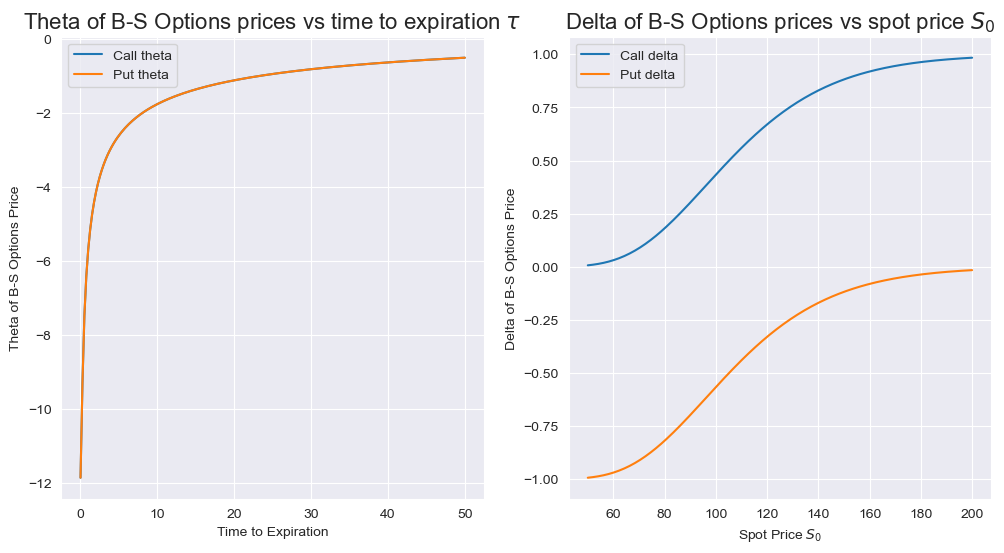

In [3]:
# Function that computes the Black Scholes deltas of call and put options

def bs_call_delta(S0, K, sigma, tau, r):
    """
    Returns the Delta (sensitivity to spot price) of a European call option
    under Black-Scholes assumptions.

    Parameters:
        S0 (float): Initial stock price
        K (float): Strike price
        sigma (float): Volatility of the stock
        tau (float): Time to maturity (in years)
        r (float): Risk-free interest rate

    Returns:
        float: Delta of Call Option
    """
    d1 = (np.log(S0/K) + (r+.5*sigma**2)*tau)/(sigma*np.sqrt(tau))
    return norm.cdf(d1)


def bs_put_delta(S0, K, sigma, tau, r):
    """
    Returns the Delta (sensitivity to spot price) of a European put option
    under Black-Scholes assumptions.

    Parameters:
        S0 (float): Initial stock price
        K (float): Strike price
        sigma (float): Volatility of the stock
        tau (float): Time to maturity (in years)
        r (float): Risk-free interest rate

    Returns:
        float: Delta of Put Option
    """
    d1 = (np.log(S0/K) + (r+.5*sigma**2)*tau)/(sigma*np.sqrt(tau))
    return norm.cdf(d1) - 1.



# Function that computes the Black Scholes thetas of call and put options


def bs_call_theta(S0,K,sigma,tau,r):
    """
    Returns the theta (rate of change with respect to time) of a European call option
    under Black-Scholes assumptions.
    
    
    To give daily theta, divide return by 252.

    Parameters:
        S0 (float): Initial stock price
        K (float): Strike price
        sigma (float): Volatility of the stock
        tau (float): Time to maturity (in years)
        r (float): Risk-free interest rate

    Returns:
        float: Theta of Call option
    """
    
    d1 = (np.log(S0/K) + (r+.5*sigma**2)*tau)/(sigma*np.sqrt(tau))
    d2 = d1 - sigma*np.sqrt(tau)
    
    return -(S0*norm.pdf(d1)*sigma)/(2*np.sqrt(tau)) - r*K*np.exp(-r*tau)*norm.cdf(d2)


def bs_put_theta(S0,K,sigma,tau,r):
    """
    Returns the theta (rate of change with respect to time) of a European put option
    under Black-Scholes assumptions.
    
    
    To give daily theta, divide return by 252.

    Parameters:
        S0 (float): Initial stock price
        K (float): Strike price
        sigma (float): Volatility of the stock
        tau (float): Time to maturity (in years)
        r (float): Risk-free interest rate

    Returns:
        float: Theta of Put option
    """
    
    d1 = (np.log(S0/K) + (r+.5*sigma**2)*tau)/(sigma*np.sqrt(tau))
    d2 = d1 - sigma*np.sqrt(tau)
    
    return - (S0*norm.pdf(d1)*sigma)/(2*np.sqrt(tau)) + r*K*np.exp(-r*tau)*norm.cdf(-d2)


K = 110
sigma = .3


# Thetas as a function of time to expiration tau

S0 = 100
times = np.linspace(1/12, 50, 200)

call_theta = [bs_call_theta(S0,K,sigma, tau = times[i],r=0) for i in range(len(times))]
put_theta = [bs_put_theta(S0,K,sigma, tau = times[i],r=0) for i in range(len(times))]

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].plot(times, call_theta, label="Call theta")
axes[0].plot(times, put_theta, label="Put theta")
axes[0].set_title(r'Theta of B-S Options prices vs time to expiration $\tau$', size = 16)
axes[0].set_xlabel('Time to Expiration')
axes[0].set_ylabel('Theta of B-S Options Price')
axes[0].legend()

# Deltas as a function of S0

S0 = np.linspace(50, 200, 221)
time = 1

call_delta = [bs_call_delta(S0[i],K,sigma, tau = time,r=0) for i in range(len(S0))]
put_delta = [bs_put_delta(S0[i],K,sigma, tau = time,r=0) for i in range(len(S0))]

axes[1].plot(S0, call_delta, label="Call delta")
axes[1].plot(S0, put_delta, label="Put delta")
axes[1].set_title(r'Delta of B-S Options prices vs spot price $S_0$', size = 16)
axes[1].set_xlabel(r'Spot Price $S_0$')
axes[1].set_ylabel('Delta of B-S Options Price')
axes[1].legend()

plt.show()

(Note that only one curve is observed in the plot on the left because the curves overlay each other.)

Perhaps another helpful graphic is to plot Black Scholes call and put prices and call and put thetas as a function of time $t$.

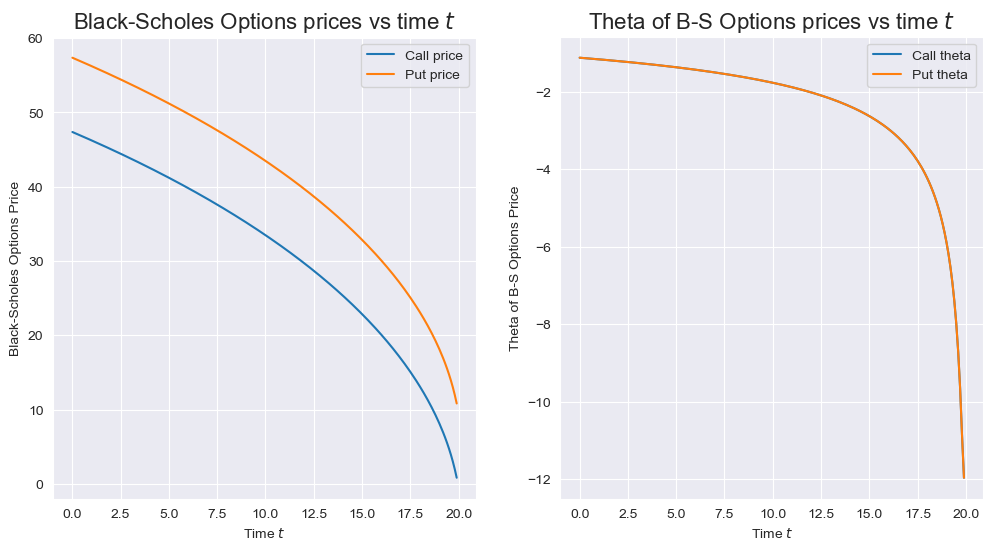

In [14]:
# Plot call and put prices and thetas as a function of time t, for some expiration time T

K = 110
sigma = .3
T = 20

S0 = 100

t=np.linspace(1/365, 19.9, 200)
taus = T-t

call_prices = [bs_call(S0,K,sigma, tau = taus[i]) for i in range(len(taus))]
put_prices = [bs_put(S0,K,sigma, tau = taus[i]) for i in range(len(taus))]

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].plot(t, call_prices, label="Call price")
axes[0].plot(t, put_prices, label="Put price")
axes[0].set_title(r'Black-Scholes Options prices vs time $t$', size = 16)
axes[0].set_xlabel(r'Time $t$')
axes[0].set_ylabel('Black-Scholes Options Price')
axes[0].legend()

# Thetas as a function of time to expiration tau

S0 = 100
t=np.linspace(1/365, 19.9, 200)
taus = T - t

call_theta = [bs_call_theta(S0,K,sigma, tau = taus[i],r=0) for i in range(len(taus))]
put_theta = [bs_put_theta(S0,K,sigma, tau = taus[i],r=0) for i in range(len(taus))]

axes[1].plot(t, call_theta, label="Call theta")
axes[1].plot(t, put_theta, label="Put theta")
axes[1].set_title(r'Theta of B-S Options prices vs time $t$', size = 16)
axes[1].set_xlabel(r'Time $t$')
axes[1].set_ylabel('Theta of B-S Options Price')
axes[1].legend()

plt.show()